In [1]:
from collections import namedtuple
from os import path
from PIL import Image, ImageDraw
from circles.adjustcolors import darken_color, lighten_color
from circles.conversions import to_hexcolor, to_rgba

# stuff that will be in a global config

width = 300
height = 100
filename = "current_program.png" 

BLACK = '#000000'
WHITE = '#ffffff'

In [58]:
# interpreter
stack = []
counter = 0
star = False

def reset_counter():
    global counter
    counter = 0

def inc_counter():
    global counter
    counter = counter + 1

def get_difference(a, b):
    if not a or not b:
        return 0
    (r_a, _, _, _) = to_rgba(a)
    (r_b, _, _, _) = to_rgba(b)
    return (r_a - r_b) / 16

def push():
    global counter
    stack.append(counter) 
    reset_counter()
    
def number_out():
    print(str(stack[-1]))

def toggle_star():
    global star
    star = not star

def evaluate(previous, current):
    if not current:
        return None
    
    if not previous:
        return inc_counter
    
    if current == BLACK:
        return toggle_star
    if current == WHITE:
        return reset_counter
    
    difference = int(abs(get_difference(previous, current))) # todo not abs
    if difference == 0:
        return inc_counter
    if difference == 1 and star == False:
        return push
    if difference == 6 and star == False:
        return number_out

def interpret(image):
    instructions = []
    i = 0
    previous = None
    while i < image.size[1]:
        current_rgb = image.getpixel((0, i))
        current_hex = to_hexcolor(current_rgb)
        global counter
        instruction = evaluate(previous, current_hex)
        if instruction != None:
            instructions.append(instruction)
        
        previous = current_hex
        i += 1
    return instructions
    

def execute(instructions):
    for instruction in instructions:
        instruction()


In [59]:
image = Image.open(filename)
instructions = interpret(image)
execute(instructions)

5


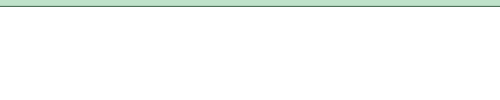

In [60]:
image

In [ ]:
"""
Next steps:
- make git repo and start working in commits
- move out common image stuff to a module + tests?
- move interpreter to own module + tests
- move 'ide' to own module + tests
- finish writing interpreter with tests
- make jupyter notebook eg
"""